<a href="https://colab.research.google.com/github/JeonJongDae/dinner_stock_AI/blob/main/5%EC%A3%BC%EC%B0%A8/Copy_of_svm_skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM(Suport Vector Machine)


**[참고자료]** 
- [SVM 개념](https://www.notion.so/SVM-88a8db59158d4886b244d523c7214f19)
- [sklearn - SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [sklearn - SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?)

# [실습 01] Binary classification

## 실습 목표
---
- 주어진 데이터를 예측하기 위해서 어떠한 AI 기술을 활용해야하는지 이해합니다.
- 의사결정트리 및 SVM 모델을 이해합니다.

## 실습 목차
---

1. **데이터 읽기:** 주어진 데이터('Dataset.csv')를 불러오고 Dataframe 구조를 확인

2. **데이터 전처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리

3. **머신러닝 모델 학습:** 분류 모델을 사용하여 학습 수행, 평가 및 예측 수행

3. **머신러닝 모델 성능 개선:** 생성한 모델의 하이퍼파라미터를 튜닝하여 모델 성능을 개선

## 실습 개요
---
머신러닝 프로세스 과정을 이해하고, 데이터 전처리, 학습, 평가 단계를 구현합니다.

## 1. 데이터 읽기
---

### 1.1 라이브러리 불러오기
---
머신러닝에 필요한 주요 라이브러리를 불러옵니다.

 - **numpy**: 수치형 데이터를 배열 구조로 처리하기 위한 라이브러리
 - **pandas**: 데이터프레임을 다루기 위한 라이브러리
 - **matplotlib.pyplot**: 데이터시각화를 위한 라이브러리
 - **seaborn**: 데이터시각화를 위한 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 데이터 불러오기
---
pandas를 사용하여 dataframe 형태로 데이터를 불러옵니다. 데이터프레임을 담을 변수는 `df`로 설정합니다.

In [2]:
# Dataset.csv 파일을 읽어오기
df = pd.read_csv('/content/Dataset.csv')

# 데이터프레임의 상위 5개 항목 출력
df.head()

,a1,a2,a3,a4,a5,a6,target
0,24,0.29,700,0.013,100,1.4,0
1,44,0.47,400,0.012,20,0.6,0
2,13,0.21,1000,0.045,40,1.7,0
3,8,0.25,400,0.008,60,0.8,0
4,38,0.15,700,0.044,40,1.2,0


7개의 컬럼을 갖는 데이터프레임을 불러왔습니다.


### 1.3 데이터 탐색
---

`df`의 컬럼별 요약정보(info)를 확인합니다. 각 컬럼별 데이터 타입과 결측치 여부를 확인합니다.

In [3]:
# 컬럼별 요약정보
df.describe()

,a1,a2,a3,a4,a5,a6,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,28.821000,0.283240,821.300000,0.027491,117.180000,1.712600,0.412000
std,10.502631,0.103347,254.560624,0.010786,45.428089,0.707079,0.492441
min,5.000000,0.050000,300.000000,0.005000,20.000000,0.200000,0.000000
25%,25.000000,0.240000,700.000000,0.021000,90.000000,1.300000,0.000000
50%,29.000000,0.290000,900.000000,0.027000,120.000000,1.800000,0.000000
75%,35.000000,0.340000,1000.000000,0.034000,150.000000,2.300000,1.000000
max,50.000000,0.500000,1200.000000,0.050000,200.000000,2.900000,1.000000


## 2. 데이터 전처리
----
머신러닝을 하기 위한 데이터 전처리를 수행합니다. 독립변수(X)와 종속변수(Y)로 각 컬럼을 나누고, 학습용 데이터와 테스트용 데이터로 분할하는 데이터 분할을 수행합니다. 독립변수(X)에 대해서 정규화를 수행합니다.

### 2.1 종속변수, 독립변수 할당
-----

In [17]:
# 전체 컬럼에서 0~5번 컬럼에 해당하는 값을 독립변수(X)로 할당
X = df.iloc[:, :6]

# nano_parcticle 컬럼을 종속변수(y)로 할당
y = df['target']

# X에 할당된 값 확인
X.head(10)

,a1,a2,a3,a4,a5,a6
0,24,0.29,700,0.013,100,1.4
1,44,0.47,400,0.012,20,0.6
2,13,0.21,1000,0.045,40,1.7
3,8,0.25,400,0.008,60,0.8
4,38,0.15,700,0.044,40,1.2
5,31,0.11,800,0.022,120,0.4
6,39,0.05,900,0.035,100,2.6
7,24,0.12,300,0.022,90,2.7
8,32,0.26,800,0.029,150,2.6
9,28,0.30,1000,0.032,160,1.7


X에 `target`를 제외한 모든 컬럼이 할당되었습니다.

### 2.2 정규화(스케일링)
-----
컬럼별 데이터 크기 및 분포의 차이가 있으므로 StandardScaler를 사용하여 정규화를 수행하겠습니다.


In [19]:
# sklearn에서 제공하는 StandardScaler를 임포트
from sklearn.preprocessing import StandardScaler

# StandardScaler() 객체 선언
sc = StandardScaler()

# X를 StandardScaler를 사용하여 z-점수 정규화(StandardScaler)수행
X = sc.fit_transform(X)

# 변환된 결과 출력
print(X)

[[-0.45925751  0.06544349 -0.47674575 -1.34422826 -0.37836934 -0.44232153]
 [ 1.44598004  1.80802171 -1.65583664 -1.43699123 -2.14027549 -1.57430241]
 [-1.50713816 -0.70903572  0.70234514  1.62418691 -1.69979895 -0.0178287 ]
 ...
 [-1.31661441 -1.96756443  1.09537544  1.62418691 -1.03908415  0.26516652]
 [ 1.82702755  1.0335425   1.48840573  1.25313502 -1.47956069  0.68965935]
 [ 0.7791469  -1.09627532  1.48840573  0.32550528  0.94306026 -2.14029285]]


In [20]:
for i in range(len(X[0])):
    print('{} 컬럼의 평균: {:.2f}, 표준편차:{}'.format(i, X[:, i].mean(), X[:, i].std()))

0 컬럼의 평균: -0.00, 표준편차:1.0
1 컬럼의 평균: 0.00, 표준편차:0.9999999999999999
2 컬럼의 평균: 0.00, 표준편차:1.0
3 컬럼의 평균: -0.00, 표준편차:0.9999999999999999
4 컬럼의 평균: -0.00, 표준편차:1.0
5 컬럼의 평균: 0.00, 표준편차:1.0


데이터의 범위가 평균 0, 표준편차 1을 기준으로 변경되었습니다.

### 2.3 학습용, 테스트용 데이터 분할
-----
train_test_split()을 사용하여 전처리가 완료된 데이터를 분할합니다.

In [24]:
# sklearn에서 제공하는 train_test_split 임포트
from sklearn.model_selection import train_test_split

# 데이터 분할
# - 테스트용 데이터의 비율을 20%로 설정
# - 동일한 샘플링 결과를 얻기 위해 random_state 설정
# - y의 비율을 기준으로 샘플링
X_train, X_test, y_train, y_test = train_test_split(X,  y,test_size = 0.2, random_state = 42, stratify=y)

# 분할된 변수의 결과 출력
print('X: {}, X_train: {}, X_test:{}'.format(X.shape, X_train.shape, X_test.shape))
print('y: {}, y_train: {}, y_test:{}'.format(y.shape, y_train.shape, y_test.shape))

X: (1000, 6), X_train: (800, 6), X_test:(200, 6)
y: (1000,), y_train: (800,), y_test:(200,)


1000개의 데이터가 학습용 데이터 700개, 테스트용 데이터 300개로 분할되었습니다.

In [25]:
# y값을 기준으로 계층적(stratified) 샘플링이 적용되어 데이터가 분할되었는지 여부를 확인
print(y.value_counts()/len(y) * 100)
print(y_train.value_counts()/len(y_train) * 100)
print(y_test.value_counts()/len(y_test) * 100)

0    58.8
1    41.2
Name: target, dtype: float64
0    58.75
1    41.25
Name: target, dtype: float64
0    59.0
1    41.0
Name: target, dtype: float64


0과 1의 비율이 학습용 데이터셋과 테스트용 데이터 셋 모두 약 59:41로 기존 데이터의 비율과 동일하게 분할되었습니다.

## 3. 머신러닝 모델 수행
-----

다음의 알고리즘을 사용하여 분류(classifier) 모델을 생성하는 머신러닝 학습을 수행합니다.

- 의사결정나무
- 서포트벡터머신

### 3.1 의사결정나무(DecisionTree)
---



#### 3.1.1 학습

DecisionTreeClassifier 클래스의 기본 매개변수를 사용하여 모델을 학습시킵니다.

In [26]:
# DecisionTreeClassifier 라이브러리 불러오기
from sklearn.tree import DecisionTreeClassifier

# 기본 매개변수를 사용하는 DecisionTreeClassifier 생성
tree = DecisionTreeClassifier(random_state=42)

# 생성한 tree 객체를 학습용 데이터를 사용하여 학습
tree.fit(X,y)

DecisionTreeClassifier(random_state=42)

#### 3.1.2 학습결과 시각화
-----

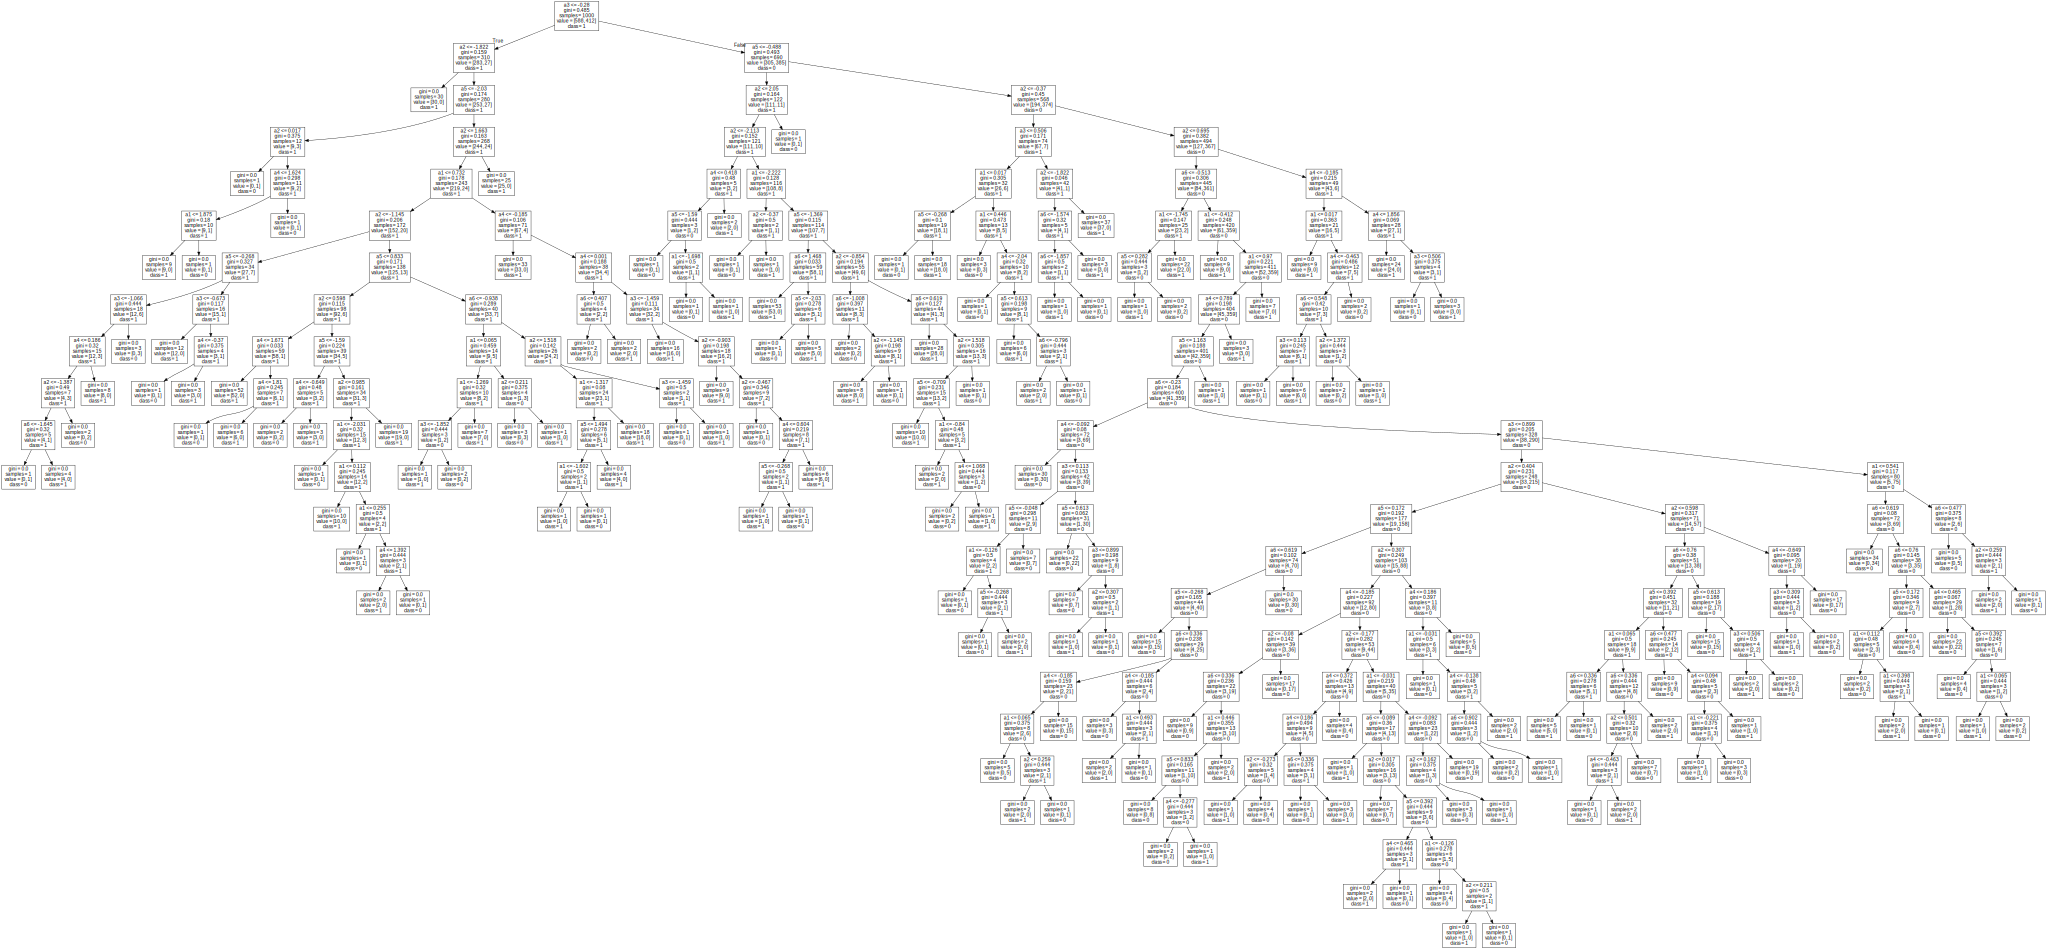

In [27]:
import graphviz
from sklearn.tree import export_graphviz

tree_img = export_graphviz(tree,feature_names=df.columns[:len(df.columns)-1],
                      class_names=["1","0"])
graphviz.Source(tree_img)

#### 3.1.3 평가

In [31]:
# 학습용 데이터 셋의 정확도
print("train 세트 정확도: {:.3f}".format(metrics.accuracy_score(X_train, y_train)))

# 테스트용 데이터 셋의 정확도
print("test 세트 정확도: {:.3f}".format(tree.predict(X_test,y_test)))

NameError: ignored

기본 매개변수를 사용하여 학습시킨 모델의 테스트 정확도는 약 86.3%입니다.

#### 3.1.4 예측
-----

In [29]:
# X_test를 입력으로하여 결과값 예측
y_pred = tree.predict(X_test)
print('예측값:' , y_pred)
print('실제값:' , y_test.values)

예측값: [1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0]
실제값: [1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0
 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0]


예측값과 실제값의 차이가 존재하는 항목이 보입니다. 차이가 나는 항목에 대해 산점도를 그려 확인해보겠습니다.

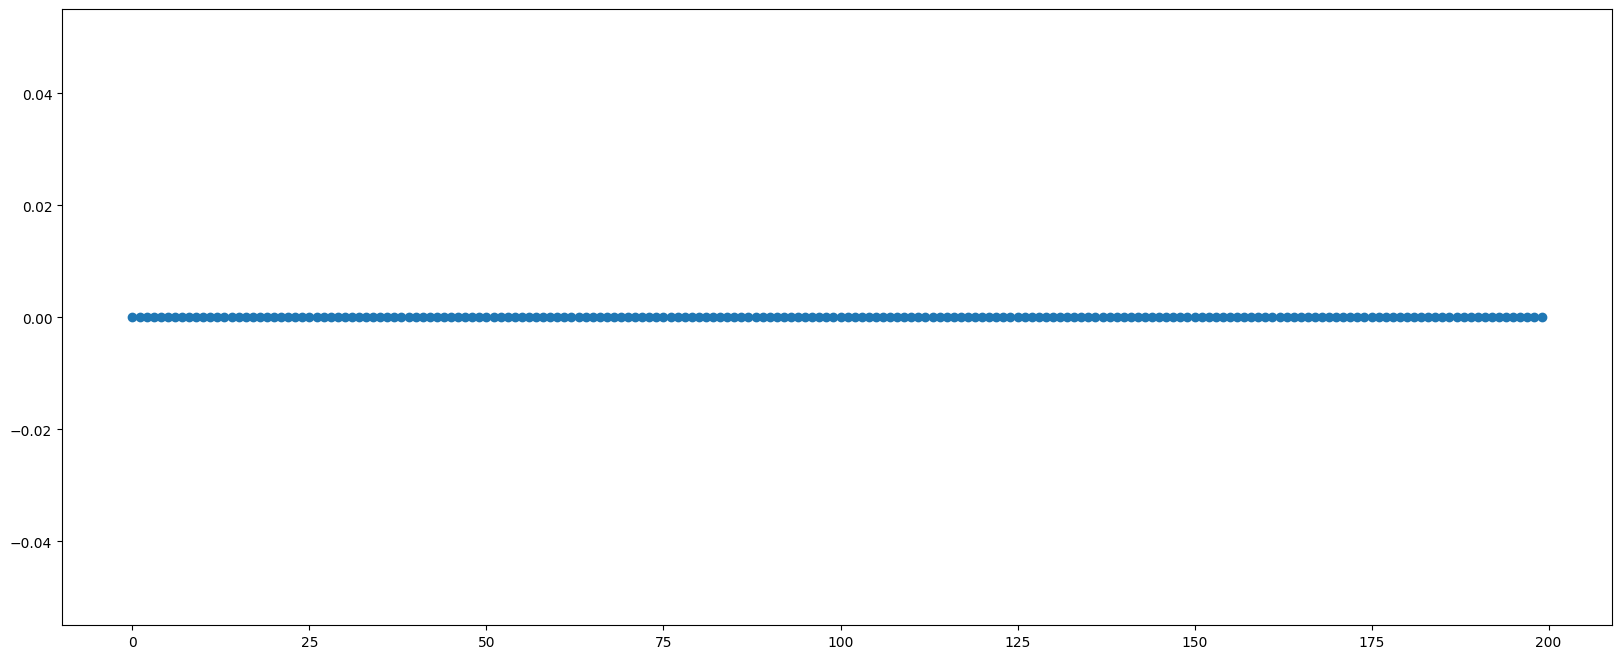

In [30]:
plt.figure(figsize=(20,8))
plt.scatter(np.arange(len(y_pred)), y_pred - y_test)

실제값과 예측값의 차이가 0으로 대부분의 값이 0에 분포합니다. 실제값이 1인데 0으로 예측한 항목은 아래 부분에, 실제값이 0인데 1로 예측한 항목은 그래프 윗부분에 표시되었습니다.

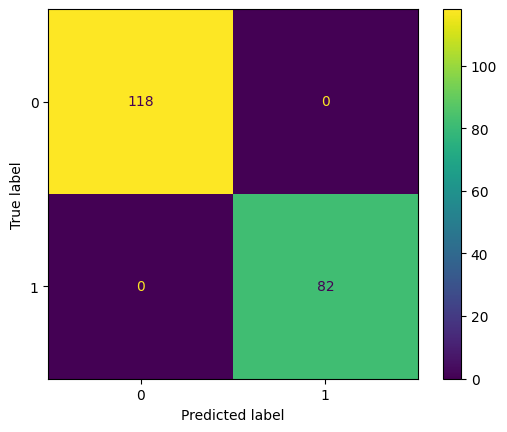

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 혼동행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 혼동행렬 시각화
cm_display = ConfusionMatrixDisplay(cm).plot()

실제값이 0인데 예측을 1로 하는 경우가 22건, 실제값이 1인데 예측을 0으로 하는 경우가 19건이 존재합니다.

### 3.2 서포트벡터머신(SVM)
----------



#### 3.2.1 학습
-----
SVC 클래스의 기본 매개변수를 사용하여 모델을 학습시킵니다.

In [ ]:
# SVC 라이브러리 불러오기
from sklearn.svm import _________

# 기본 매개변수를 사용하여 SVC 객체 생성
classifier = _________

# 생성한 SVC 객체를 학습용 데이터를 사용하여 학습
classifier._________(_________, _________)

#### 3.2.2 평가
-----

In [ ]:
# 학습용 데이터 셋의 정확도
print("train 세트 정확도: {:.3f}".format(classifier._________(_________, _________)))

# 테스트용 데이터 셋의 정확도
print("test 세트 정확도: {:.3f}".format(classifier._________(_________, _________)))

기본 매개변수를 사용하여 학습시킨 모델의 테스트 정확도는 약 87.7%입니다.

#### 3.1.3 예측
-----

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 혼동행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 혼동행렬 시각화
cm_display = ConfusionMatrixDisplay(cm).plot()

실제값이 0인데 예측을 1로 하는 경우가 19건, 실제값이 1인데 예측을 0으로 하는 경우가 18건 존재합니다.

## 4. 모델 성능 개선
-----

모델 생성시 주요 매개변수를 변화시켜보고, 그에 따른 정확도 변화를 확인합니다.

### 4.1 DecisionTree 매개변수 변경
-----

#### 4.1.1 max_depth

In [ ]:
#  변경할 max_depth 
max_depth=[1,2,3,4,5,6,7,8,9,10]

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in max_depth:
    # max_depth 변경하여 모델 생성
    tuned_tree = DecisionTreeClassifier(random_state=42, ___________ = i)

    # 생성한 tree 객체를 학습용 데이터를 사용하여 학습
    tuned_tree.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_tree.score(X_train, y_train))
    test_scores.append(tuned_tree.score(X_test, y_test))
    
    # 정확도 출력
    print("max_depth = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i, train_scores[i-1], test_scores[i-1]))

In [ ]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('DecisionTreeClassifier Scores by max_depth')
plt.plot(max_depth, train_scores, label='Train',linewidth=2, marker='o')
plt.plot(max_depth, test_scores, label='Test',linewidth=2, marker='o')
plt.legend()

`max_depth`의 값을 크게 설정할 수록 학습용 데이터의 성능은 증가하고 테스트용 데이터의 정확도는 증가하다가 어느 시점부터 감소함을 확인할 수 있습니다.

#### 4.1.2 min_samples_split

In [ ]:
#  변경할 min_samples_split 
min_samples_split =[2,3,4,5,6,7,8,9,10]

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in min_samples_split:
    # min_samples_split 변경하여 모델 생성
    tuned_tree = DecisionTreeClassifier(random_state=42, __________________ = i)

    # 생성한 tree 객체를 학습용 데이터를 사용하여 학습
    tuned_tree.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_tree.score(X_train, y_train))
    test_scores.append(tuned_tree.score(X_test, y_test))
    
    # 정확도 출력
    print("min_samples_split = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i, train_scores[i-2], test_scores[i-2]))

In [ ]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('DecisionTreeClassifier Scores by min_samples_split')
plt.plot(min_samples_split, train_scores, label='Train',linewidth=2, marker='o')
plt.plot(min_samples_split, test_scores, label='Test',linewidth=2, marker='o')
plt.legend()

`min_samples_split`의 값을 크게 설정할 수록 학습용 데이터의 성능은 떨어지고 테스트용 데이터의 정확도는 약간 증가함을 확인할 수 있습니다.

#### 4.1.3 min_samples_leaf

In [ ]:
#  변경할 min_samples_leaf 
min_samples_leaf=[1,2,3,4,5,6,7,8,9,10]

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in min_samples_leaf:
    # min_samples_leaf 변경하여 모델 생성
    tuned_tree = DecisionTreeClassifier(random_state=42, _____________ = i)

    # 생성한 tree 객체를 학습용 데이터를 사용하여 학습
    tuned_tree.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_tree.score(X_train, y_train))
    test_scores.append(tuned_tree.score(X_test, y_test))
    
    # 정확도 출력
    print("min_samples_leaf = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i, train_scores[i-1], test_scores[i-1]))

In [ ]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('DecisionTreeClassifier Scores by min_samples_leaf')
plt.plot(min_samples_leaf, train_scores, label='Train',linewidth=2, marker='o')
plt.plot(min_samples_leaf, test_scores, label='Test',linewidth=2, marker='o')
plt.legend()

`min_samples_leaf`의 값을 크게 설정할 수록 학습용 데이터의 성능은 떨어지고 테스트용 데이터의 정확도는 약간 증가함을 확인할 수 있습니다.

#### 4.1.4 max_features

In [ ]:
#  변경할 max_features, 선언된 변수에서 10을 나눠주어 비율로 설정
max_features=[1,2,3,4,5,6,7,8,9,10]

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in max_features:
    # max_features 변경하여 모델 생성
    tuned_tree = DecisionTreeClassifier(random_state=42, ________________ = i/10)

    # 생성한 tree 객체를 학습용 데이터를 사용하여 학습
    tuned_tree.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_tree.score(X_train, y_train))
    test_scores.append(tuned_tree.score(X_test, y_test))
    
    # 정확도 출력
    print("max_features = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i/10, train_scores[i-1], test_scores[i-1]))

In [ ]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('DecisionTreeClassifier Scores by max_features')
plt.plot(max_features, train_scores, label='Train',linewidth=2, marker='o')
plt.plot(max_features, test_scores, label='Test',linewidth=2, marker='o')
plt.legend()

`max_features`의 비율을 다르게 설정하더라도 모델의 성능 변화가 크게 없음을 확인할 수 있습니다. 

#### 4.1.5 max_leaf_nodes

In [ ]:
#  변경할 max_leaf_nodes
max_leaf_nodes=[2,3,4,5,6,7,8,9,10]

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in max_leaf_nodes:
    # max_features 변경하여 모델 생성
    tuned_tree = DecisionTreeClassifier(random_state=42, ________________ = i)

    # 생성한 tree 객체를 학습용 데이터를 사용하여 학습
    tuned_tree.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_tree.score(X_train, y_train))
    test_scores.append(tuned_tree.score(X_test, y_test))
    
    # 정확도 출력
    print("max_leaf_nodes = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i, train_scores[i-2], test_scores[i-2]))

In [ ]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('DecisionTreeClassifier Scores by max_leaf_nodes')
plt.plot(max_leaf_nodes, train_scores, label='Train',linewidth=2, marker='o')
plt.plot(max_leaf_nodes, test_scores, label='Test',linewidth=2, marker='o')
plt.legend()

`max_leaf_nodes`의 값을 크게 설정할 수록 학습용 데이터와 테스트용 데이터의 정확도가 모두 높아지고 있음을 확인할 수 있습니다.

### 4.2 SVC 매개변수 변경
-----

#### 4.2.1 C
-----

In [ ]:
#  변경할 C 
C=[1.0, 2.0, 3.0, 4.0, 5.0]

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in C:
    # C를 변경하여 모델 생성
    tuned_svc = SVC(____ = i)

    # 생성한 SVC 객체를 학습용 데이터를 사용하여 학습
    tuned_svc.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_svc.score(X_train, y_train))
    test_scores.append(tuned_svc.score(X_test, y_test))
    
    # 정확도 출력
    print("C = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i, train_scores[int(i)-1], test_scores[int(i)-1]))

In [ ]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('SVC Scores by C')
plt.plot(C, train_scores, label='Train',linewidth=2, marker='o')
plt.plot(C, test_scores, label='Test',linewidth=2, marker='o')
plt.legend()

`C`를 2~4로 설정했을 때 테스트 셋의 정확도가 가장 높은 모델이 만들어졌습니다.

#### 4.2.2 kernel
-----

In [ ]:
#  변경할 kernel
kernel=['linear', 'poly', 'rbf', 'sigmoid']

# 매개변수에 따른 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장하기 위한 변수
train_scores = []
test_scores = []

for i in kernel:
    # kernel를 변경하여 모델 생성
    tuned_svc = SVC(___________ = i)

    # 생성한 SVC 객체를 학습용 데이터를 사용하여 학습
    tuned_svc.fit(X_train, y_train)

    # 학습데이터 셋, 테스트 데이터셋에 대한 정확도를 저장
    train_scores.append(tuned_svc.score(X_train, y_train))
    test_scores.append(tuned_svc.score(X_test, y_test))
    
    # 정확도 출력
    print("C = {}, train 세트 정확도: {:.3f}, test 세트 정확도: {:.3f}".\
          format(i, tuned_svc.score(X_train, y_train), tuned_svc.score(X_test, y_test)))

In [ ]:
# 매개변수 변화에 따른 학습데이터와 테스트데이터에 대한 정확도 변화 시각화
plt.title('SVC Scores by kernel')
index = np.arange(len(kernel))
bar_width = 0.35
plt.bar(index, train_scores, bar_width, label='Train')
plt.bar(index + bar_width, test_scores, bar_width, label='Test')
plt.xticks(index+ bar_width/2, kernel)
plt.legend()

`kernel`을 rbf로 설정하였을 때 가장 좋은 성능을 보이는 모델이 생성되었습니다.

### 4.3 GridSearchCV - DecisionTree
---
cross_validate를 사용하여 기존의 학습데이터(X_train, y_train)를 3등분하여 학습데이터와 검증용 데이터의 역할을 번갈아 수행하는 교차검증을 진행합니다.

In [ ]:
# cross_validate 라이브러리 불러오기
from sklearn.model_selection import cross_validate

# cross_validate를 사용하여 모델의 교차 검증
scores = cross_validate(tree, X_train, y_train, cv=3, return_estimator=True)

# cross_validate 결과 확인
scores

3개의 의사결정나무가 각각 다른 학습 데이터 셋을 사용하여 생성되었습니다. 3개의 의사결정나무를 테스트용 데이터셋을 사용하여 정확도를 확인합니다.

In [ ]:
# 3개의 분류기 평가
for i in range(3):     
    score = scores['estimator'][i].score(X_test, y_test)
    print('{0}번째 의사결정나무 정확도: {1:.2f}'.format(i+1, score))

3개의 의사결정나무의 평균 정확도는 교차검증을 수행하기 이전보다 감소하였습니다. GridSearchCV를 사용하여 교차검증을 수행하며 최적의 하이퍼파라미터를 찾습니다.

In [ ]:
from sklearn.model_selection import GridSearchCV

# 변경하여 설정할 매개변수의 항목을 딕셔너리 형태로 정의
param = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

# GridSearchCV 객체 선언, 교차검증 3회 수행
grid_trees = GridSearchCV(tree, param_grid=param, cv=3)

# 학습 - param_grid의 하이퍼파라미터들을 순차적으로 학습
grid_trees.fit(X_train, y_train)

# 학습 결과 - GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_trees.cv_results_)

# 학습결과를 담은 데이터프레임의 6번째 컬럼 이후부터 출력
scores_df.iloc[:, 6:]

변경하여 설정할 매개변수가 총 3 x 2 = 6개의 조합이 가능하므로, 6개의 의사결정나무에 대한 결과를 확인할 수 있습니다. rank_test_score가 가장 작은값인 {'max_depth': 3, 'min_samples_split': 2}와 {'max_depth': 3, 'min_samples_split': 3}의 성능이 약 80%로 가장 좋음을 확인할 수 있습니다. 
<br><br>
GridSearchCV의 결과 중 최적의 성능을 보인 분류기에 대한 매개변수와 성능을 다음과 같이 확인할 수 있습니다.

In [ ]:
# 최적 estimator
grid_trees.best_estimator_

In [ ]:
# 최적 매개변수
grid_trees.best_params_

In [ ]:
# 최적 estimator의 성능
grid_trees.best_score_

최적의 성능을 보인 의사결정나무를 사용하여 학습을 다시 수행합니다.

In [ ]:
# 생성한 tree 객체를 학습용 데이터를 사용하여 학습
grid_tree = grid_trees.best_estimator_ 
grid_trees.best_estimator_.fit(X_train, y_train)

# 학습용 데이터 셋의 정확도
print("train 세트 정확도: {:.3f}".format(grid_tree.score(X_train, y_train)))

# 테스트용 데이터 셋의 정확도
print("test 세트 정확도: {:.3f}".format(grid_tree.score(X_test, y_test)))

### 4.4 GridSearchCV - SVM
----
GridSearchCV를 사용하여 교차검증을 수행하며 최적의 하이퍼파라미터를 찾습니다.

In [ ]:
# 파라미터
param = {'C':[1.0, 2.0, 3.0, 4.0, 5.0], 'kernel':['linear', 'poly', 'rbf', 'sigmoid']}

# 학습 - param_grid의 하이퍼파라미터들을 순차적으로 학습
grid_classifier = GridSearchCV(classifier, param_grid=param, cv=3)
grid_classifier.fit(X_train, y_train)

# 학습 결과 - GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_svm_df = pd.DataFrame(grid_classifier.cv_results_)

# 학습결과를 담은 데이터프레임의 6번째 컬럼 이후부터 출력
scores_svm_df.iloc[:, 6:]

최적의 성능을 보인 모델을 사용하여 학습을 다시 수행합니다.

In [ ]:
# 생성한 tree 객체를 학습용 데이터를 사용하여 학습
svm_grid = grid_classifier.best_estimator_
svm_grid.fit(X_train, y_train)

# 학습용 데이터 셋의 정확도
print("train 세트 정확도: {:.3f}".format(svm_grid.score(X_train, y_train)))

# 테스트용 데이터 셋의 정확도
print("test 세트 정확도: {:.3f}".format(svm_grid.score(X_test, y_test)))

-----
# [실습 02] breast cancer data
-----
 
위에서 학습한 내용을 유방암 데이터 셋을 사용하여 복습해봅니다.

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

dataset = load_breast_cancer()
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()